# Business Understanding

## Project Domain

Menurut Organisasi Kesehatan Dunia (WHO), stroke merupakan penyebab kematian terbanyak ke-2 di dunia, yang bertanggung jawab atas sekitar 11% dari total kematian.
Set data ini digunakan untuk memprediksi apakah seorang pasien kemungkinan terkena stroke berdasarkan parameter input seperti jenis kelamin, usia, berbagai penyakit, dan status merokok. Setiap baris dalam data memberikan informasi yang relevan tentang pasien.

## Problem Statements

Bagaimana memanfaatkan data karakteristik pasien (seperti usia, jenis kelamin, kondisi kesehatan, kebiasaan hidup) untuk memprediksi kemungkinan terjadinya stroke menggunakan model ANN, sehingga dapat membantu proses skrining awal risiko stroke secara otomatis?

## Goals

- Mengembangkan model prediksi stroke berbasis Artificial Neural Network (ANN) dengan akurasi yang baik.

- Membuat aplikasi berbasis web menggunakan Streamlit untuk mempermudah pengguna menginput data dan mendapatkan prediksi risiko stroke secara real-time.

- Memberikan insight kepada stakeholder tentang faktor-faktor utama yang berhubungan dengan risiko stroke.

## Solution Statements

Untuk menjawab kebutuhan deteksi dini risiko stroke secara otomatis dan akurat, solusi yang akan dikembangkan adalah:

- Pengumpulan dan Pemahaman Data:
Menggunakan dataset Stroke Prediction dari Kaggle yang berisi fitur-fitur seperti usia, jenis kelamin, status hipertensi, penyakit jantung, status pernikahan, pekerjaan, area tempat tinggal, tingkat glukosa, BMI, dan status merokok. Data ini akan dibersihkan, diproses, dan dipahami untuk membangun model prediksi yang akurat.

- Pengembangan Model Prediksi dengan Artificial Neural Network (ANN):
Membuat dan melatih model ANN yang mampu memprediksi kemungkinan stroke berdasarkan input data pasien. ANN dipilih karena fleksibilitas dan kemampuannya menangani hubungan non-linear antar fitur.

- Evaluasi Model:
Melakukan evaluasi model dengan berbagai metrik performa seperti akurasi, precision, recall, f1-score, dan ROC-AUC, untuk memastikan bahwa model tidak hanya akurat, tapi juga mampu menangani ketidakseimbangan data (imbalance) antara kasus stroke dan non-stroke.

- Deploy Model ke Aplikasi Web Streamlit:
Membuat aplikasi berbasis Streamlit yang memungkinkan pengguna (dokter, pasien, atau pihak medis lain) untuk:

- Menginput karakteristik pasien melalui form interaktif.

- Mendapatkan hasil prediksi secara real-time.

# Data Understanding

## Import data dari kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ridadarmayantiputri","key":"e3695e43bed7c53a24cec41d334857e1"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors
  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 286MB/s]


In [5]:
!mkdir stroke-prediction-dataset
!unzip stroke-prediction-dataset.zip -d stroke-prediction-dataset
!ls stroke-prediction-dataset

Archive:  stroke-prediction-dataset.zip
  inflating: stroke-prediction-dataset/healthcare-dataset-stroke-data.csv  
healthcare-dataset-stroke-data.csv


## Import Library yang dibutuhkan

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import joblib
import pickle

In [7]:

df = pd.read_csv('/content/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
print("Dataset shape:", df.shape)
print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (5110, 12)

Missing values:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [9]:
print("\nStroke distribution:")
print(df['stroke'].value_counts())
print(f"Stroke rate: {df['stroke'].mean():.3f}")


Stroke distribution:
stroke
0    4861
1     249
Name: count, dtype: int64
Stroke rate: 0.049


## Exploratory Data Analysis

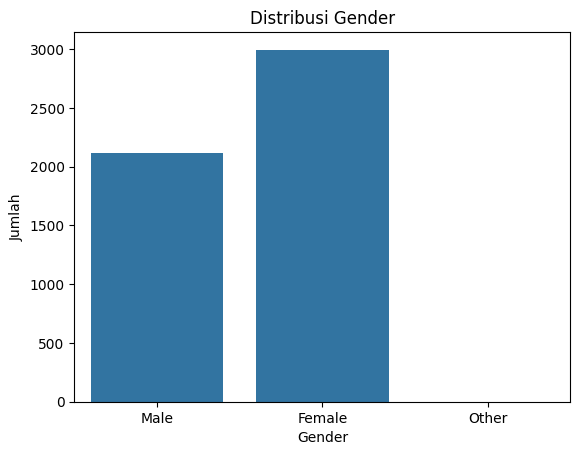

In [10]:
# 1
sns.countplot(data=df, x='gender')
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show()

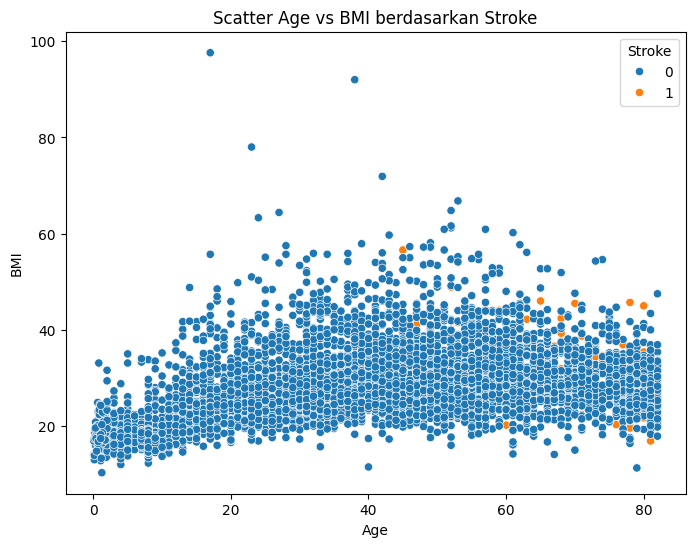

In [11]:
# 2
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='age', y='bmi', hue='stroke')
plt.title('Scatter Age vs BMI berdasarkan Stroke')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Stroke', loc='best')
plt.show()

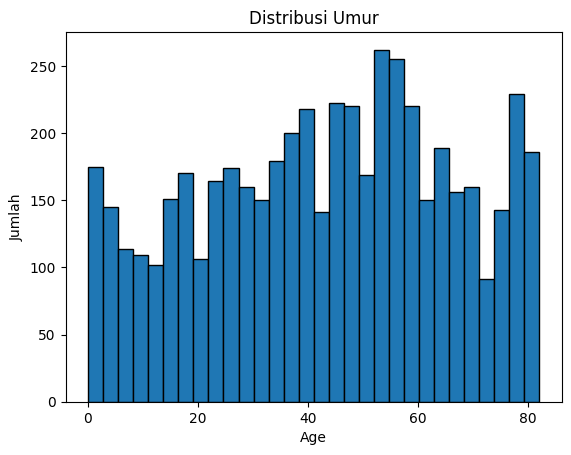

In [12]:
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Distribusi Umur')
plt.xlabel('Age')
plt.ylabel('Jumlah')
plt.show()

<Figure size 1800x1200 with 0 Axes>

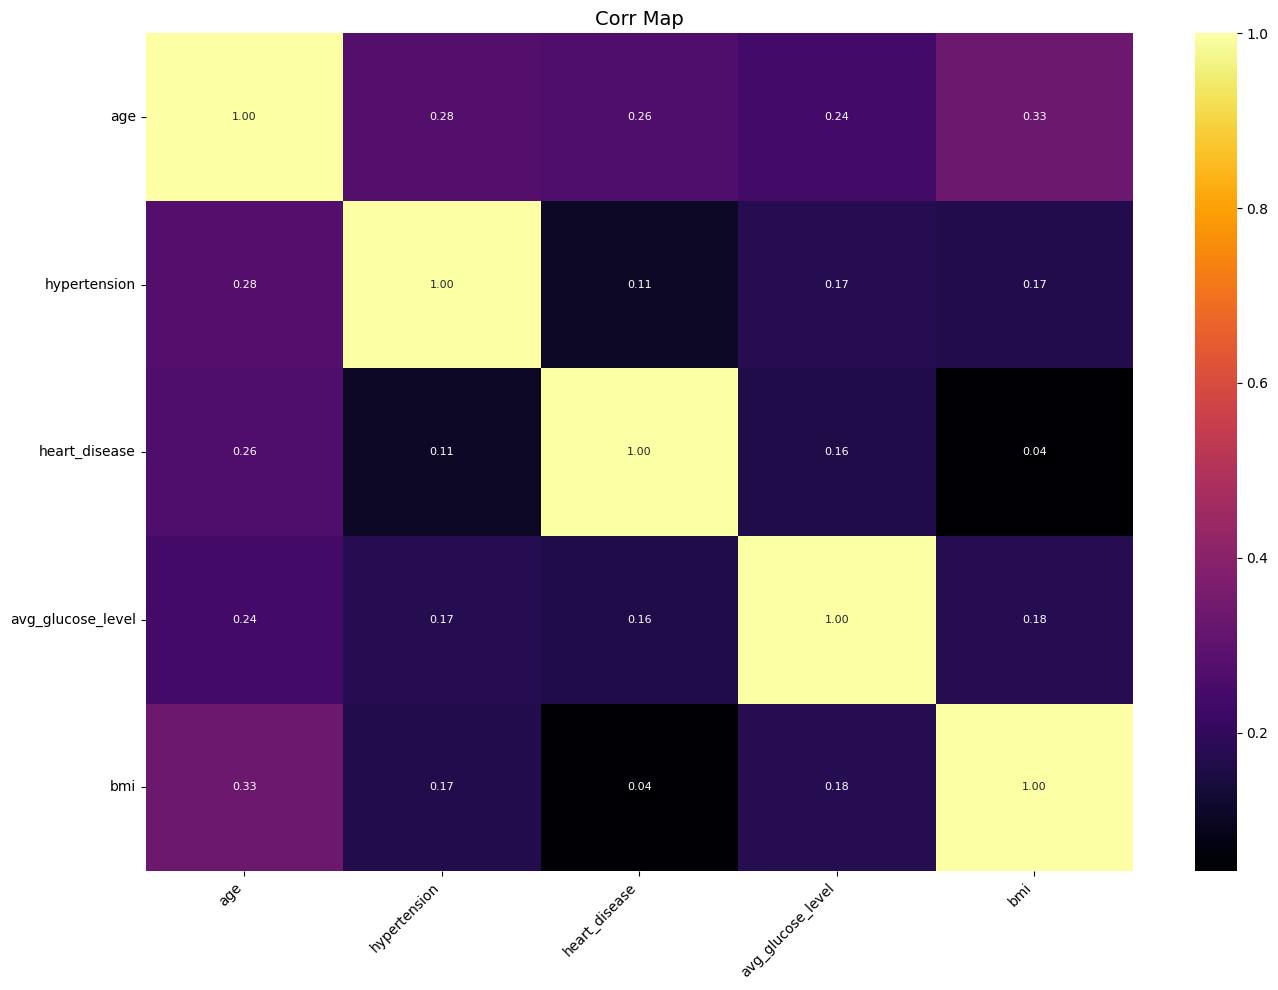

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


# Korelasyon matrisi

# Korelasyon ısı haritası
plt.figure(figsize=(18, 12))

selected_cols = ["age", "hypertension", "heart_disease", "avg_glucose_level","bmi"]
plt.figure(figsize=(14, 10))
sns.heatmap(df[selected_cols].corr(), annot=True, fmt=".2f", cmap="inferno",
            cbar=True, annot_kws={"size": 8})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Corr Map", fontsize=14)
plt.tight_layout()
plt.show()

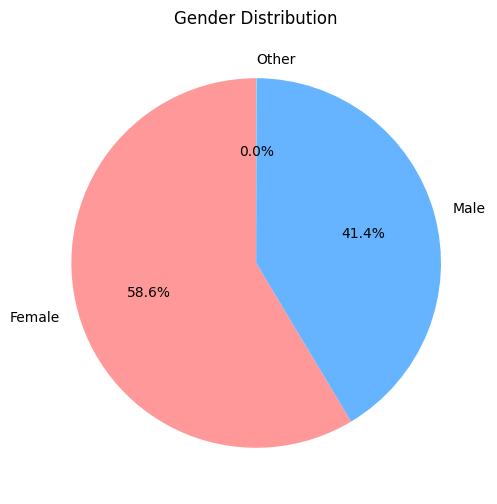

In [14]:
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(6,6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

# Data Preparation

In [15]:
df = df.dropna()

In [16]:
label_encoders = {}

In [17]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [18]:
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [19]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [20]:
X = df.drop(['stroke', 'id'], axis=1)
y = df['stroke']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [24]:
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)

In [25]:
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
print(f"\nClass weights: {class_weight_dict}")


Class weights: {0: np.float64(0.5222074468085106), 1: np.float64(11.75748502994012)}


# Modeling

In [26]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1], kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall']
)

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 12,737 (49.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [29]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 12,737 (49.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [31]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

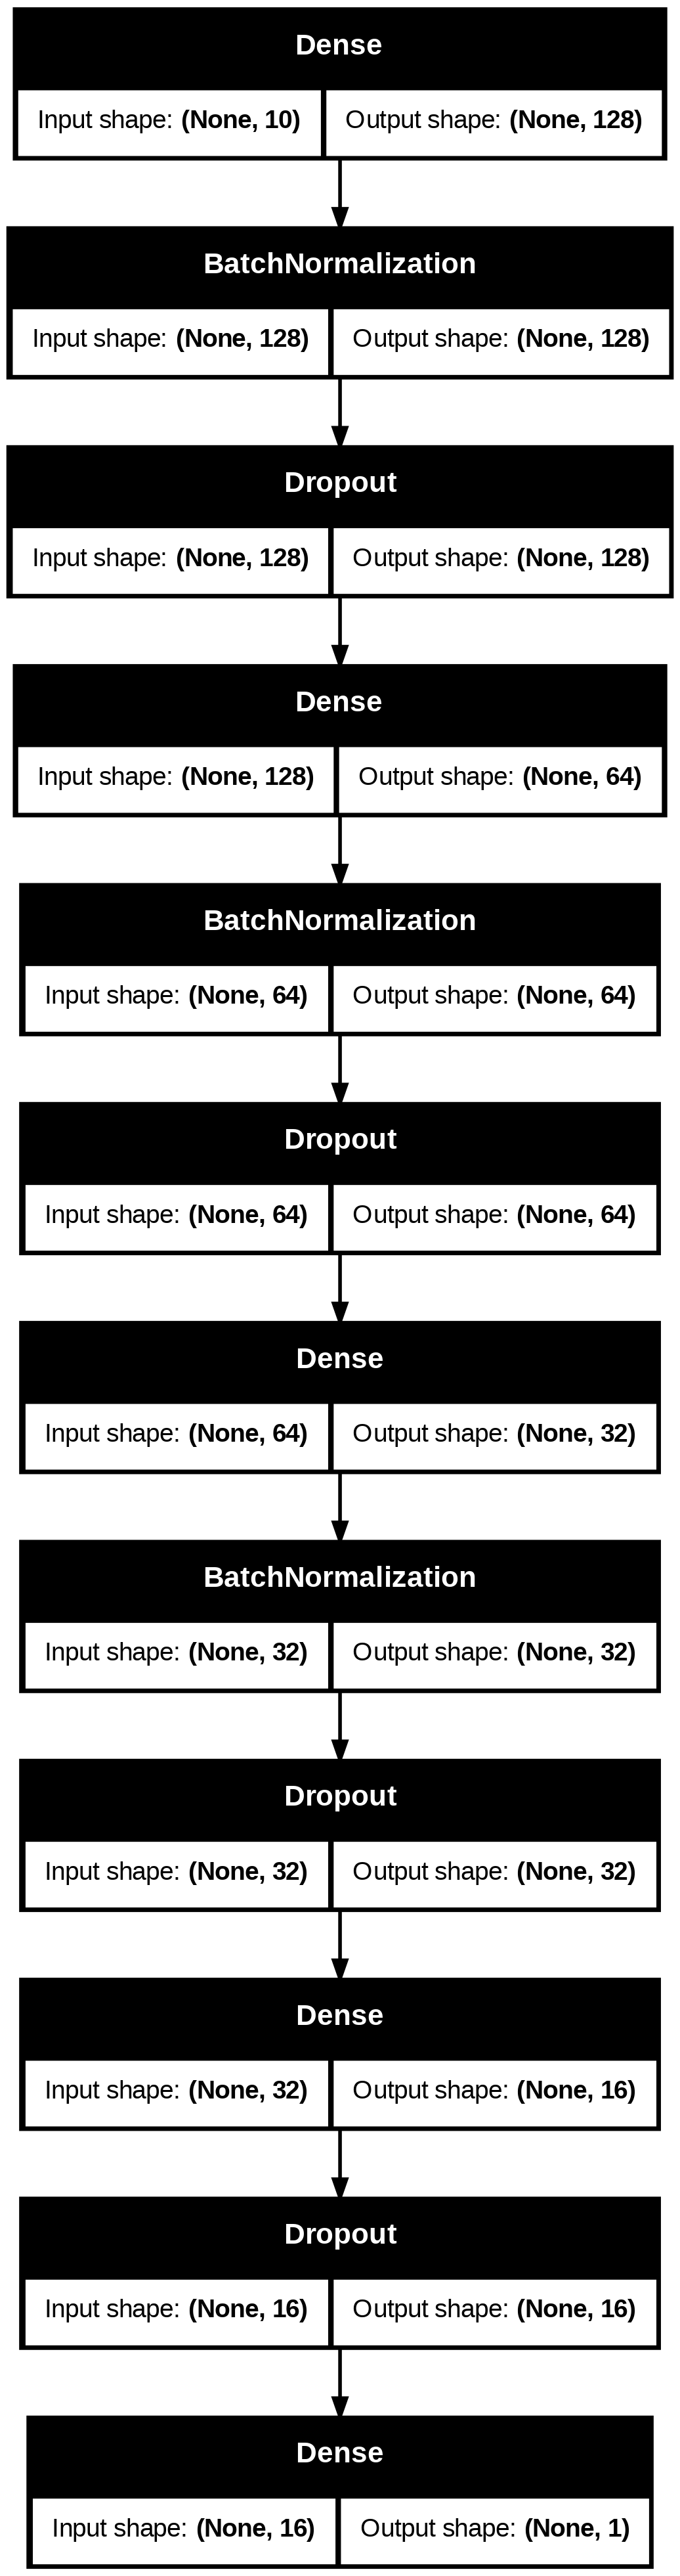

In [32]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [33]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=1e-7,
    verbose=1
)

In [34]:
history = model.fit(
    X_train_balanced, y_train_balanced,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6702 - loss: 0.7805 - precision: 0.6688 - recall: 0.6655 - val_accuracy: 0.6609 - val_loss: 0.6871 - val_precision: 0.0901 - val_recall: 0.7619 - learning_rate: 0.0010
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7874 - loss: 0.6065 - precision: 0.7456 - recall: 0.8701 - val_accuracy: 0.7098 - val_loss: 0.6084 - val_precision: 0.1042 - val_recall: 0.7619 - learning_rate: 0.0010
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8068 - loss: 0.5739 - precision: 0.7582 - recall: 0.8949 - val_accuracy: 0.7138 - val_loss: 0.6081 - val_precision: 0.0976 - val_recall: 0.6905 - learning_rate: 0.0010
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8227 - loss: 0.5398 - precision: 0.7763 - recall: 0.9052 - val_accuracy: 0.7413 - val_loss: 0.5757 - val_precision: 0.1015 - val_recall: 0.6429 - learning_rate: 0.0010
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc

# Evaluation

In [35]:
test_loss, test_acc, test_precision, test_recall = model.evaluate(X_test_scaled, y_test, verbose=0)

In [36]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [37]:
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test precision: {test_precision:.4f}')
print(f'Test recall: {test_recall:.4f}')

Test accuracy: 0.8666
Test precision: 0.1261
Test recall: 0.3571


In [38]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[836 104]
 [ 27  15]]


Text(0.5, 1.0, 'Model Accuracy')

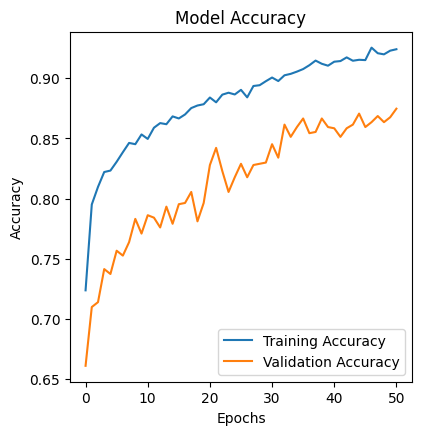

In [39]:
# Accuracy plot
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

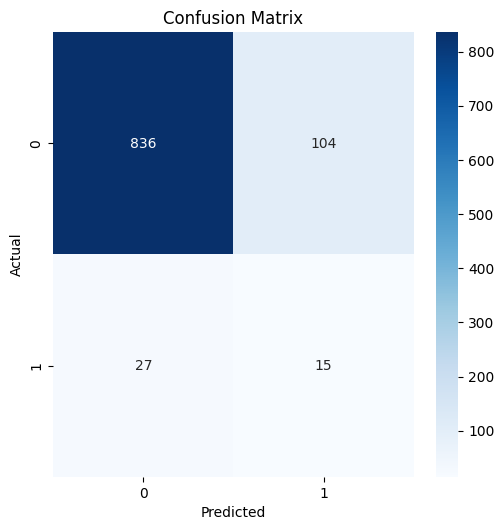

In [40]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 6)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Deployment

## Simulation

In [44]:
# Test dengan pasien berisiko tinggi
high_risk_sample = np.array([[1, 75, 1, 1, 1, 2, 1, 250.0, 35.0, 3]])

In [48]:
# Scale the sample data
sample_data_scaled = scaler.transform(high_risk_sample)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [50]:
# Make prediction
prediction_prob = model.predict(sample_data_scaled)
predicted_class = (prediction_prob > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


In [51]:
print(f'Probability of stroke: {prediction_prob[0][0]:.4f}')
print(f'Predicted class: {"Stroke" if predicted_class[0][0] == 1 else "No Stroke"}')

Probability of stroke: 0.9950
Predicted class: Stroke


## Save Model

In [52]:
model_filename = 'stroke_prediction_model.h5'
model.save(model_filename)

In [53]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [54]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]

In [55]:
tflite_model = converter.convert()
tflite_filename = 'stroke_prediction_model.tflite'
with open(tflite_filename, 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpmivf_dyt'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  131948817762256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131948878340816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131948817764560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131948817765904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131948817764176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131948817762448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131948817766480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131948817768208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131948817768592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131948817769168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131948817766672: Tensor